<a href="https://colab.research.google.com/github/SaiArjunSairamje/EDA-on-Haberman-Survival-Data-Set/blob/main/(EDA)%20''Haberman's_Survival_DataSet''%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><ins>Exploratory Data Analysis (EDA) of ''Haberman's Survival Dataset''</ins></center>

**Dataset Description:** The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of Attributes: 4 (including the class attribute)
* Attribute Information:
    > a. Age of patient at time of operation (numerical)                                                                     
    > b. Patient's year of operation (year - 1900, numerical)                                                                   
    > c. Number of positive axillary nodes detected (numerical)                                                               
    > d. Survival status (class attribute)                                                                                     
       1 = the patient survived 5 years or longer                                                                             
       2 = the patient died within 5 year

**Objective / Tasks:** Perform an **"Exploraroty Data Analysis (EDA)"** for the **"Haberman's Survival Dataset"** to determine the best feature of the 2 classification that can be used to predict survival status of a new patient with the given below sections which is similar to the **"IRIS Dataset"** analysis discuessed in the **"Applied AI Course (AAIC)"** :

   > 1. Import Libraries
   > 2. Load Dataset
   > 3. Data Insights (i.e. number of points, numer of features, number of classes, data-points per class)
   > 4. Data Visualization for better understanding of the Dataset
   > 5. Perform Univaraite analysis (PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification
   > 6. Perform Bi-variate analysis (Scatter plots, Pair-plots) to see if combinations of features are useful in classfication
   > 7. Perform Multi-variate analysis (Contour-plot) to see if combinations of features are useful in classfication
   > 8. Additional statistics on independent variables (i.w. mean, std, percentiles, median, IDR, MAD, Quantiles)
   > 9. Colclusions
   > 10. References

**Kaggle Dataset:** https://www.kaggle.com/gilsousa/habermans-survival-data-set/code

## <ins>Importing the Libraries</ins>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <ins>Loading the Dataset</ins>

In [ ]:
#Load haberman.csv into a pandas dataFrame
haberman = pd.read_csv("haberman.csv")

In [ ]:
# shows the top 5 records of the dataset
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# shows the bottom 5 records of the dataset
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [ ]:
# shows the top 5 records and bottom 5 records of the dataset
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
# NOTE: If the original dataset did not have any headers/column-name, then we can update the respective column-name for the dataset as below:
# haberman.columns = ['age', 'operation_year', 'axil_nodes', 'survival_status']
# haberman.columns

## <ins>Data Insights</ins>

In [ ]:
# (Q) how many number of data-points (i.e. vector/observation) and number of features (i.e variables/input-variable/independent-variable)?
haberman.shape

(306, 4)

**Observations:**
* Dataset comprises of 306 observations and 4 characteristics.
* Out of which 1 is dependent variable and rest 3 are independent variables.

In [ ]:
#(Q) What are the column names (i.e. features/variables/etc...) in our dataset?
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Observations:**
* Out of the 4 characteristics / features / variables, the "Dependent" variable is "Status".
* The "Independent" variables are "Age", "Year", "Nodes".

In [ ]:
#(Q) How many data points for each class (i.e. class-label/output-variable/dependent-variable/response label) are present?
# The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observations:**
* We can see that there are 2 class-labels (i.e. 1 and 2) in the dataset.
* Out of 306 patients datapoints, 225 patients survived and 81 did not.
* Hence we can notice that the dataset is **"imbalanced dataset"**.

In [ ]:
# How many number of class-label in the dataset (i.e. unique values of target variable)?
# https://www.geeksforgeeks.org/python-pandas-series-unique/
# https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html
print(haberman['status'].unique())

[1 2]


**Observations:**
* Similar to the previous code, we can find the number of class-labels in a given dataset by using the Pandas unique() function.
* Here we can see that there are 2 class-labels for the ''Haberman's Survival DataSet'' which are 1 and 2.

In [ ]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
* **Age:** The age of the patients vary from the minimum age of 30 to maximum age of 83 with a mean value of 52.457516 and median value (i.e. 50%) of 52.
* **Year:** Oldest patient to have the surgery was 69 years old and the youngest was 58 years old with a mean of age 62 and median value (i.e 50%) of 63.
* **Nodes:** 75% of data points have less than 5 detected axilary nodes and nearly 25% have no detected nodes.
* **Status:** More than 50% of the patients survived 5 years or more.



In [ ]:
# Gaining information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observations:**
* Data has only integer values for all the features
* No variable column has null/missing values.
* The Class-label (i.e. status) is Integer and needs to converted to valid Categirical datatype.

We need to map the target values to **'survived' (patient survived after 5 years)** and **'not-survived' (patient died within 5 years)** for meaningful classification.

In [ ]:
haberman['status'] = haberman['status'].map({1:'survived', 2:'not-survived'})
haberman

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived
...,...,...,...,...
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,not-survived


**Observations:**
* Now the target values have been mapped to **'survived' (patient survived after 5 years)** and **'not-survived' (patient died within 5 years)** for meaningful classification.

## <ins>Data Visualization for better understanding of the Dataset</ins>

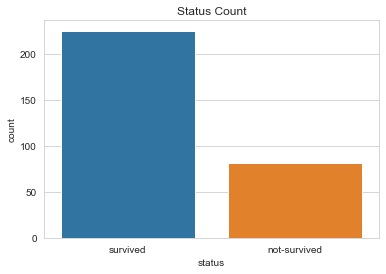

In [ ]:
# Visualization on target column
# https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

sns.set_style("whitegrid")
plt.title('Status Count')
sns.countplot(haberman['status'])

**Observations:**
* This histogram provides a more visual pattern of the 2 class-lables namely, **"survived"** & **"not-survived"** in which we can notice that the dataset is **"imbalanced"**.

In [ ]:
# percentage of classes in the dataset
# https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6

haberman['status'].value_counts(normalize=True)

survived        0.735294
not-survived    0.264706
Name: status, dtype: float64

**Observations:**
* We can see that the target column is **imbalanced** with 74% people who have survived 5 years or more (i.e. Status = survived) and 26% of people did not survive and died within 5 years (i.e. Status = not-survived).

In [ ]:
# Correlation between variables
haberman.corr()

,age,year,nodes
age,1.000000,0.089529,-0.063176
year,0.089529,1.000000,-0.003764
nodes,-0.063176,-0.003764,1.000000


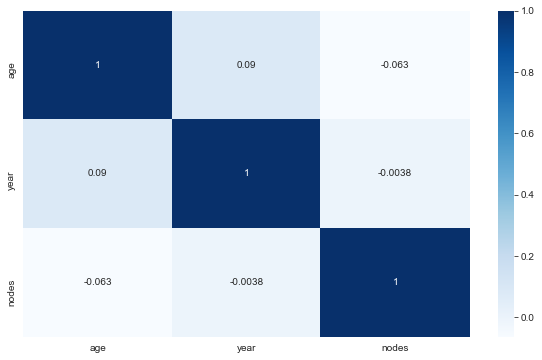

In [ ]:
# We can visulize this Correlation using a Heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig = plt.figure(figsize = (10,6))
sns.heatmap(haberman.corr(), cmap='Blues', annot = True)

**Observations:**
* From the above Heatmap, we can see that none of the features have a high correlation.   

## <ins>Perform Univaraite analysis (PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification</ins>

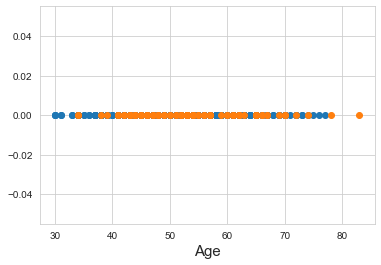

In [ ]:
# 1-D scatter plot using just one feature (i.e. "age" for this example)?
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
# https://matplotlib.org/stable/tutorials/introductory/pyplot.html

sns.set_style("whitegrid")

haberman_survived = haberman.loc[haberman["status"] == "survived"];
haberman_not_survived = haberman.loc[haberman["status"] == "not-survived"];

plt.plot(haberman_survived["age"], np.zeros_like(haberman_survived["age"]), 'o')
plt.plot(haberman_not_survived["age"], np.zeros_like(haberman_not_survived["age"]), 'o')
plt.xlabel("Age", fontsize=15)

plt.show()

**Observations:**
* Uable to make sense as points as they are overlapping a lot.
* To covercome this issue of 1D Scatter-plot, we can use "Smoothed-Histogram" with "Probability Density Function (PDF)".

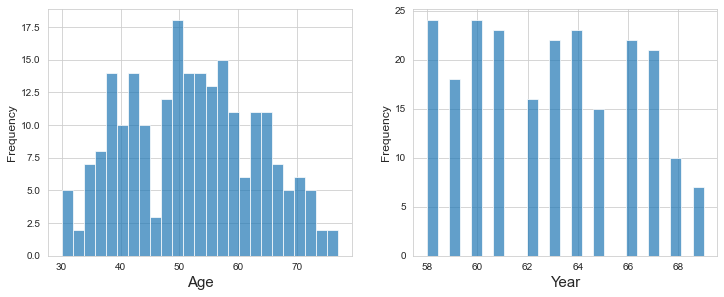

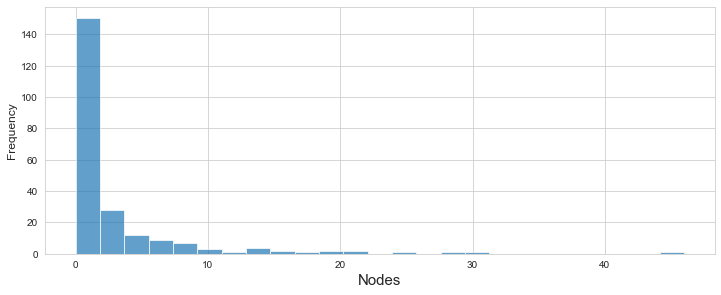

In [ ]:
# Histogram
# Matplotlib is used to plot histogram and Numpy is used to calculate count and bin edges.
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# https://datatofish.com/plot-histogram-python/

sns.set_style("whitegrid")

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.hist(haberman_survived["age"], bins=25, alpha=0.7)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency", fontsize=12)

plt.subplot(2,2,2)
plt.hist(haberman_survived["year"], bins=25, alpha=0.7)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Frequency", fontsize=12)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.hist(haberman_survived["nodes"], bins=25, alpha=0.7)
plt.xlabel("Nodes", fontsize=15)
plt.ylabel("Frequency", fontsize=12)

plt.show()

**Observations:**
* The histogram is used for variables whose values are numerical and measured on an interval scale. In this case we can see the different numerical values of the "age", "year", and "nodes" variables.

### 1.  "Probability Density Function (PDF)" with "Smoothed-Histogram"

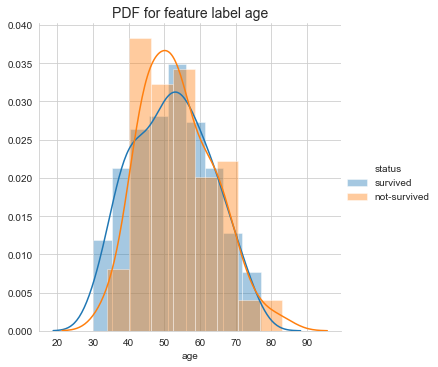

----------------------------------------------------------------------


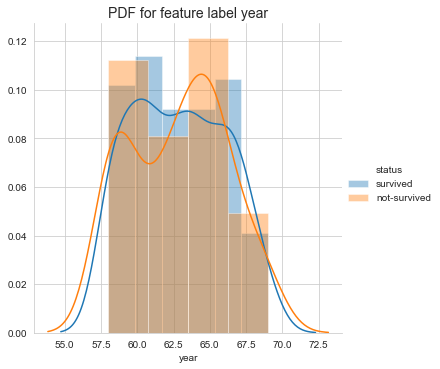

----------------------------------------------------------------------


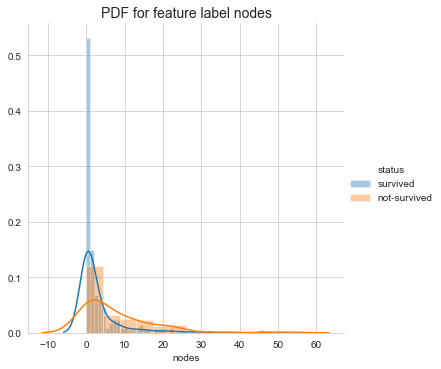

----------------------------------------------------------------------


In [ ]:
# sns.FacetGrid(haberman, hue="status", size=5) \
#    .map(sns.distplot, "age") \
#    .add_legend()
# plt.show()

# sns.FacetGrid(haberman, hue="status", size=5) \
#    .map(sns.distplot, "year") \
#    .add_legend()
# plt.show()

# sns.FacetGrid(haberman, hue="status", size=5) \
#    .map(sns.distplot, "nodes") \
#    .add_legend()
# plt.show()

#NOTE: Instead of creating PDF's for separate features, we can combine them using "for-loop" function
# http://seaborn.pydata.org/tutorial/axis_grids.html?highlight=map

for column in haberman.columns[:-1]:
    sns.FacetGrid(haberman,hue="status",height=5) \
        .map(sns.distplot,column) \
        .add_legend()
    plt.title('PDF for feature label ' + column, fontsize=14)
    plt.show()
    print('-'*70)

**Observations:**
* We can see that there is a massive overlap in the distribution of target class-label for all the features considered individually.
* Hence, we can see that the Cumulative Distribution Function (CDF) is helpful in obtaining more meaningful insights.

### 2. Cumulative Distribution Function (CDF)

Bins_Edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF:  [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


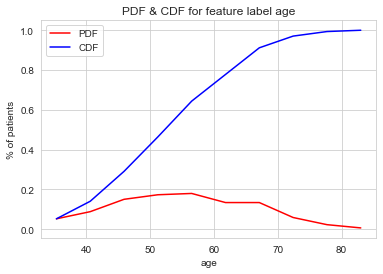

 
----------------------------------------------------------------------
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF:  [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


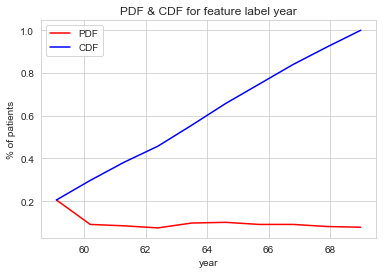

 
----------------------------------------------------------------------
Bins_Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF:  [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


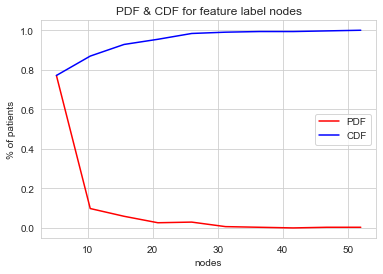

 
----------------------------------------------------------------------


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

for column in haberman.columns[:-1]:
    counts, bins_edges = np.histogram(haberman[column], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)

    print("Bins_Edges: ", bins_edges)
    print("PDF: ", pdf)
    print("CDF: ", cdf)

    plt.plot(bins_edges[1:],pdf, 'r-',label='PDF')
    plt.plot(bins_edges[1:],cdf, 'b-',label='CDF')

    plt.xlabel(column)
    plt.ylabel('% of patients')
    plt.legend(('PDF','CDF'))
    plt.title('PDF & CDF for feature label ' + column)
    plt.show()

    print(" ")
    print('-'*70)

**Observations:**
* 90% of non-survived patients were above the age of 65.

AGE-->
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
YEAR-->
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
Nodes-->
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


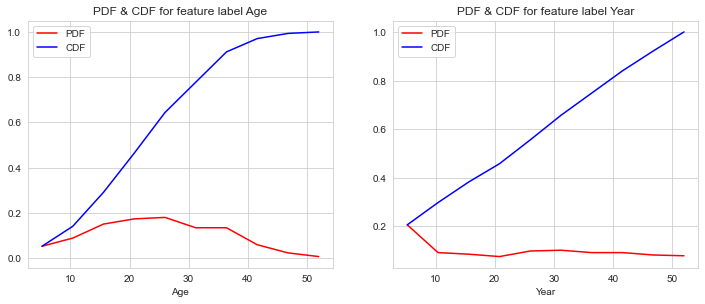

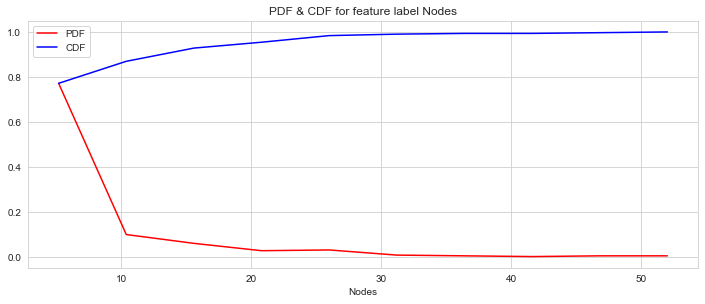

In [ ]:
# Alternative approach of displaying the "Cumulative Distribution Function (CDF)"

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
counts, bin_edges= np.histogram(haberman['age'],density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf,'r-',label='PDF')
plt.plot(bins_edges[1:],cdf,'b-',label='CDF')
plt.xlabel('Age')
plt.title('PDF & CDF for feature label Age')
plt.legend()
print('AGE-->', bins_edges, pdf, cdf, sep='\n')

plt.subplot(2,2,2)
counts, bin_edges= np.histogram(haberman['year'],density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf,'r-',label='PDF')
plt.plot(bins_edges[1:],cdf,'b-',label='CDF')
plt.title('PDF & CDF for feature label Year')
plt.xlabel('Year')
plt.legend()
print('YEAR-->', bins_edges, pdf, cdf, sep='\n')

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
counts, bin_edges= np.histogram(haberman['nodes'],density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf,'r-',label='PDF')
plt.plot(bins_edges[1:],cdf,'b-',label='CDF')
plt.title('PDF & CDF for feature label Nodes')
plt.xlabel('Nodes')
plt.legend()
print('Nodes-->', bins_edges, pdf, cdf, sep='\n')
plt.show()

### 3. Box-Plot

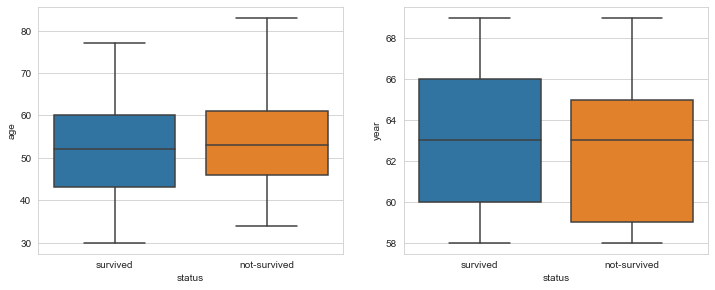

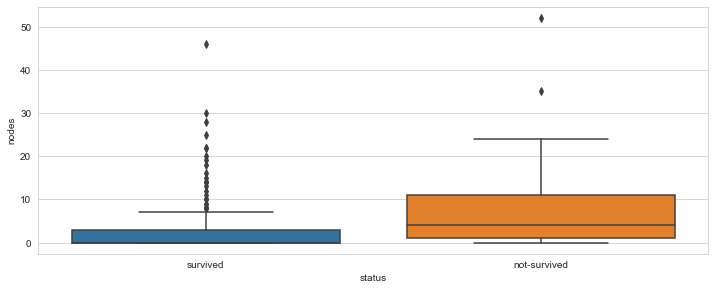

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/pyplot.html
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)                    # subplot(nrows, ncols, index, **kwargs)
sns.boxplot(x='status', y='age', data=haberman)

plt.subplot(2,2,2)
sns.boxplot(x='status', y='year', data=haberman)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(x='status',y='nodes', data=haberman)

plt.show()

**Observations:**
* In Plot 1, we can see that the patients of age between 30-42 had greater chance of survival.
* As per Plot 2, we can notice that the patients who got operated till 1960 had greater chances of survival and those patients after 1965 had greater chance of death.
* In Plot 3, around 75 percentile of survived patients was having around 5 auxillary nodes and 50-75 percentile of non-survived patients was having auxillary nodes between the range of 5-to-12 as seen from the diagram above.

### 4. Violin plots

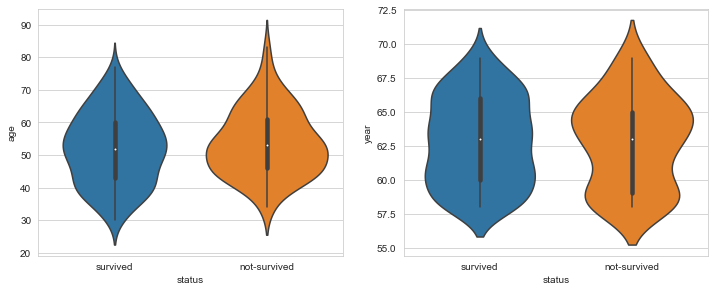

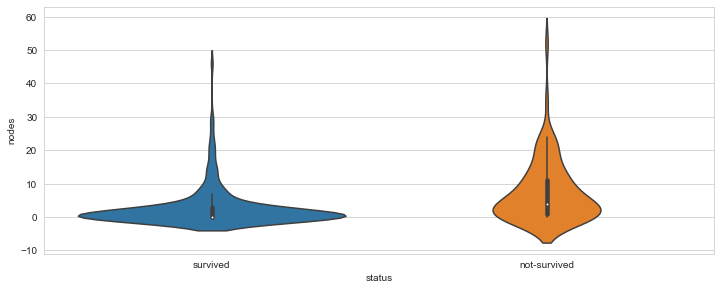

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(data=haberman,x='status',y='age')

plt.subplot(2,2,2)
sns.violinplot(data=haberman,x='status',y='year')

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.violinplot(data=haberman,x='status',y='nodes')

plt.show()

**Observations:**
* 75% of the patients who have less than or equal to 5 nodes survived more than 5years.
* From an overall univariate analysis, we can find that Auxillary Nodes attribute is important feature for classification of Survived patients.

  

## <ins> Perform Bi-variate analysis (Scatter plots, Pair-plots) to see if combinations of features are useful in classfication</ins>

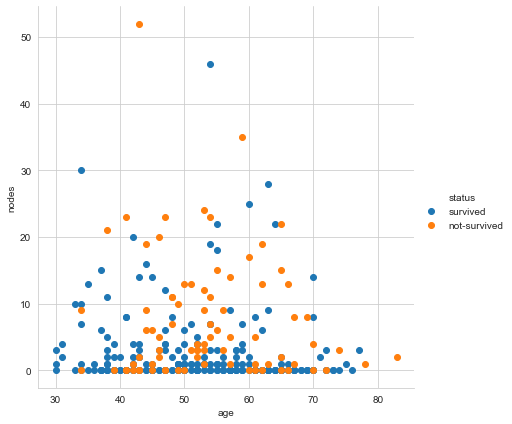

In [ ]:
# 2D Scatter Plot with color-coding for each class type/class.
sns.FacetGrid(haberman, hue="status", height=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()

**Observations:**
* With the incresing number of nodes detected above, there are more people who did not-survive within 5 years than people who survived.
* Also, we can notice that people who survived generally had few nodes.

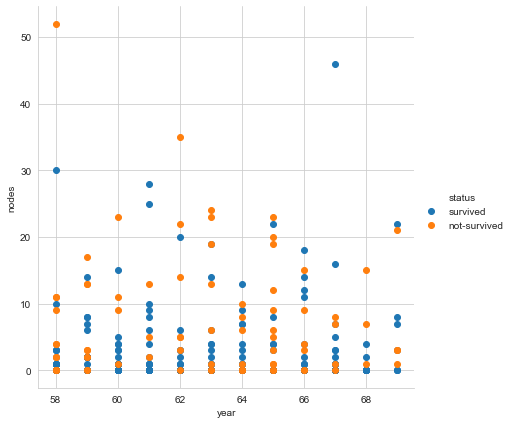

In [ ]:
sns.FacetGrid(haberman, hue="status", height=6) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend()
plt.show()

**Observations:**
* We cannot make any proper decision based on this analysis as since the increasing number of nodes, almost equal number of people how survived and not-survived is displayed.

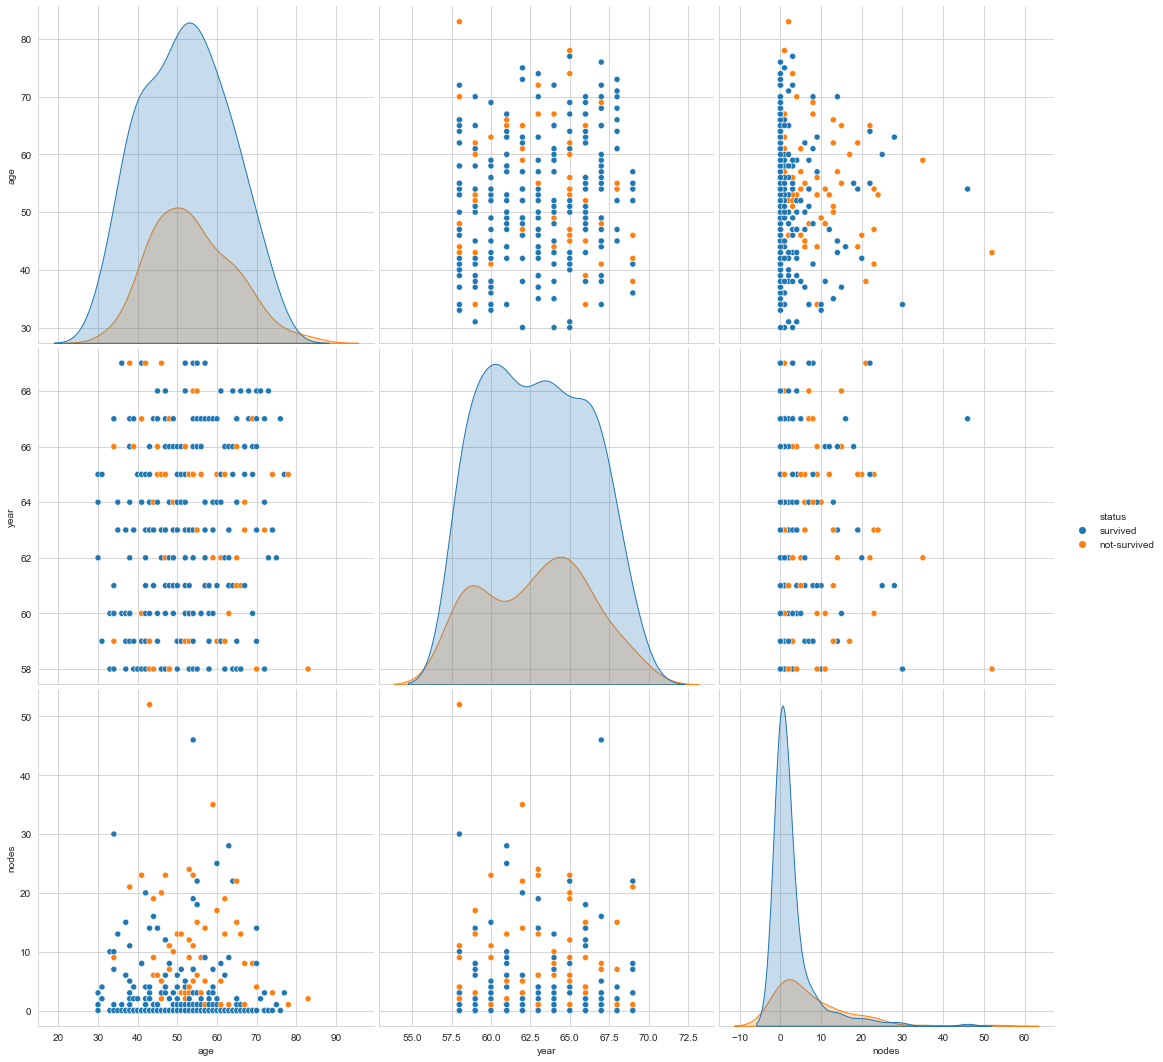

In [ ]:
# 2D Pair-Plot for dimensions greater than 2D and until 6D to 7D can be used for analysis.
# https://www.geeksforgeeks.org/matplotlib-pyplot-close-in-python/

plt.close()
sns.pairplot(haberman, hue="status", height=5)
plt.show()

**Observations:**
* The "nodes" and "age" are the most useful features to identify various class types.
* There are a lot of overlap between the two classes (i.e. survived and not-survived) which can not be simply separated.

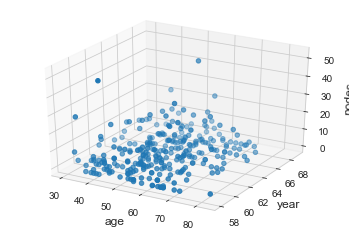

In [ ]:
# 3D mplot3d can be used for 3 dimension feature analysis
# https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
# https://stackoverflow.com/questions/30223161/matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=haberman["age"], ys=haberman["year"], zs=haberman["nodes"])

ax.set_xlabel('age', fontsize=12)
ax.set_ylabel('year', fontsize=12)
ax.set_zlabel('nodes', fontsize=12)

plt.show()

## <ins>Perform Multi-variate Analysis (i.e Contour-plot) to see if combinations of features are useful in classfication</ins>

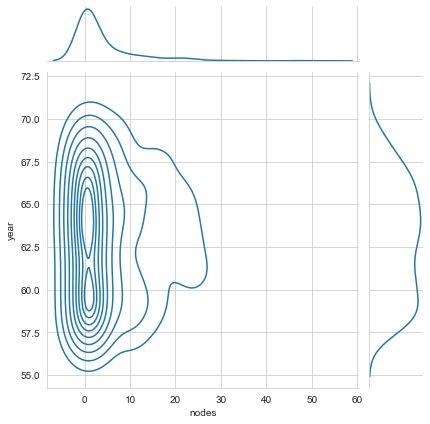

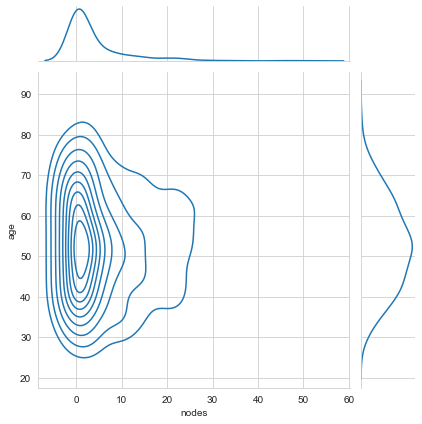

In [ ]:
# 2D Density plot, Contour-plot
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

# joint_kws={'shade_lowest':False}
# https://stackoverflow.com/questions/39346693/plot-uniform-background-color-with-seaborn-jointplot

sns.jointplot(x="nodes", y="year", data=haberman, kind="kde", joint_kws={'shade_lowest':False})
plt.show()

sns.jointplot(x="nodes", y="age", data=haberman, kind="kde", joint_kws={'shade_lowest':False})
plt.show()

**Observations:**
* There seem to be no dependency between age and number of nodes

## <ins>Additional statistics on "age", "year", and "nodes" variables (mean, std-dev, median, quantiles, percentiles, IDR, MAD)</ins>

In [ ]:
from statsmodels import robust      # https://www.statsmodels.org/stable/generated/statsmodels.robust.scale.mad.html
from scipy.stats import iqr       # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html

for column in haberman.columns[:-1]:

    print(column,"variable: ")
    print('-'*70)

    print("Mean: ", np.mean(haberman[column]))
    print("Std-dev: ", np.std(haberman[column]))
    print("Median: ", np.median(haberman[column]))
    print("Quantiles: ", np.percentile(haberman[column],np.arange(0,100,25)))
    print("90th Percentile: ", np.percentile(haberman[column],90))
    print("Median Absolute Deviation: ", robust.mad(haberman[column]))
    print("IQR: ", iqr(haberman[column]))

    print(" ")
    print('-'*70)

age variable: 
----------------------------------------------------------------------
Mean:  52.45751633986928
Std-dev:  10.78578520363183
Median:  52.0
Quantiles:  [30.   44.   52.   60.75]
90th Percentile:  67.0
Median Absolute Deviation:  11.860817748044816
IQR:  16.75
 
----------------------------------------------------------------------
year variable: 
----------------------------------------------------------------------
Mean:  62.85294117647059
Std-dev:  3.244090833563246
Median:  63.0
Quantiles:  [58.   60.   63.   65.75]
90th Percentile:  67.0
Median Absolute Deviation:  4.447806655516806
IQR:  5.75
 
----------------------------------------------------------------------
nodes variable: 
----------------------------------------------------------------------
Mean:  4.026143790849673
Std-dev:  7.177896092811152
Median:  1.0
Quantiles:  [0. 0. 1. 4.]
90th Percentile:  13.0
Median Absolute Deviation:  1.482602218505602
IQR:  4.0
 
------------------------------------------------

## <ins>Conclusions</ins>

* The "Haberman's Survival DataSet" has a total of 306 data points with 4 features which is insufficient to predict the survival rate of new patients.  
* The dataset is also an "Imbalanced Dataset" due to which there could be bias towards the output of the prediction.
* Upon analysis of the different features, we can notice that the patient's age and year of operation alone are not deciding factors for the survival.
* Among all the 3 features of the dataset, we notice that the feature "nodes" is the most informative among other features.
* With the increasing number of axillary nodes, the chance of survival of patient decrease. Similarily, having zero axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

## <ins>References</ins>

* https://en.wikipedia.org/wiki/Exploratory_data_analysis
* https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
* https://www.analyticsvidhya.com/blog/2021/04/mastering-exploratory-data-analysiseda-for-data-science-enthusiasts/
* https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
* https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda
* https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d
* https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes
* https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb
* https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673
* https://www.analyticsvidhya.com/blog/2021/06/walk-through-of-haberman-cancer-survival-dataset-exploratory-data-analysis/
* https://medium.com/@rndayala/eda-on-haberman-d
* https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
* https://www.kaggle.com/gilsousa/habermans-survival-data-set
* https://www.kaggle.com/vj1998/haberman-s-survival-exploratory-data-analysis
* https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis
* https://seaborn.pydata.org/generated/seaborn.violinplot.html
* https://seaborn.pydata.org/generated/seaborn.jointplot.html
* https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
* https://www.geeksforgeeks.org/matplotlib-pyplot-close-in-python/
* https://www.statsmodels.org/stable/generated/statsmodels.robust.scale.mad.html
* https://numpy.org/doc/stable/reference/generated/numpy.histogram.html